In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [21]:

path = "../datasets/ecommerce-analysis/"
orders = pd.read_csv(path + "olist_orders_dataset.csv")
order_items = pd.read_csv(path + "olist_order_items_dataset.csv")
products = pd.read_csv(path + "olist_products_dataset.csv")
customers = pd.read_csv(path + "olist_customers_dataset.csv")
sellers = pd.read_csv(path + "olist_sellers_dataset.csv")
payments = pd.read_csv(path + "olist_order_payments_dataset.csv")
reviews = pd.read_csv(path + "olist_order_reviews_dataset.csv")
geo = pd.read_csv(path + "olist_geolocation_dataset.csv")
categories = pd.read_csv(path + "product_category_name_translation.csv")


In [22]:
df = pd.merge(orders, order_items, on="order_id")


--- olist_customers_dataset.csv ---
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  



--- olist_geolocation_dataset.csv ---
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0      

In [23]:
df = df[df["order_status"] == "delivered"]
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# Calculate daily sales
df['total_price'] = df['price'] + df['freight_value']
daily_sales = df.groupby(df['order_purchase_timestamp'].dt.date).agg({
    'total_price': 'sum',
    'order_id': 'nunique'
}).reset_index().rename(columns={'order_purchase_timestamp':'date', 'total_price':'sales', 'order_id':'orders'})

print(daily_sales.head())

         date    sales  orders
0  2016-09-15   143.46       1
1  2016-10-03   559.53       7
2  2016-10-04  9821.42      54
3  2016-10-05  7209.50      35
4  2016-10-06  6798.90      41


In [28]:
df = daily_sales[['date','sales']]
df = df.rename(columns={'date':'ds', 'sales':'y'})


In [29]:
model = Prophet()
model.fit(df)

00:38:09 - cmdstanpy - INFO - Chain [1] start processing
00:38:10 - cmdstanpy - INFO - Chain [1] done processing


In [30]:
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

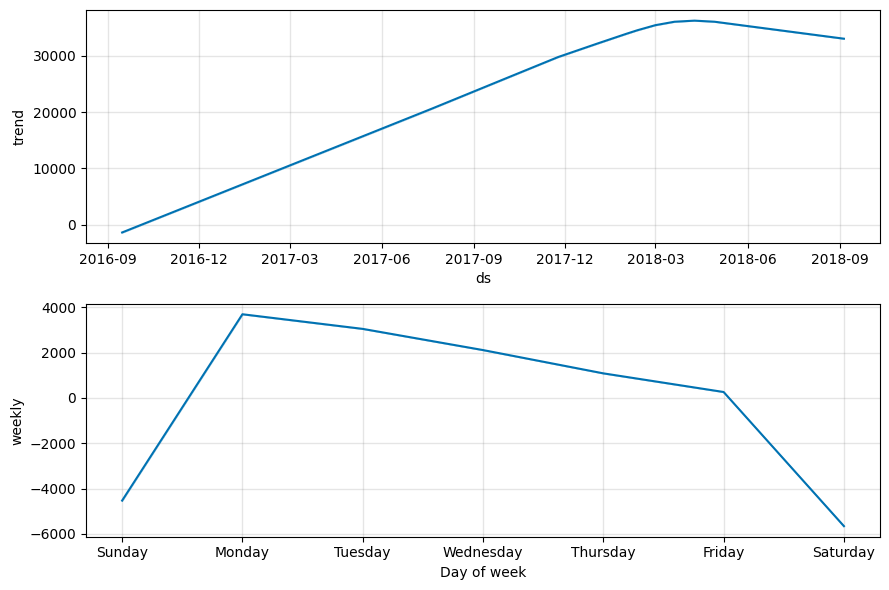

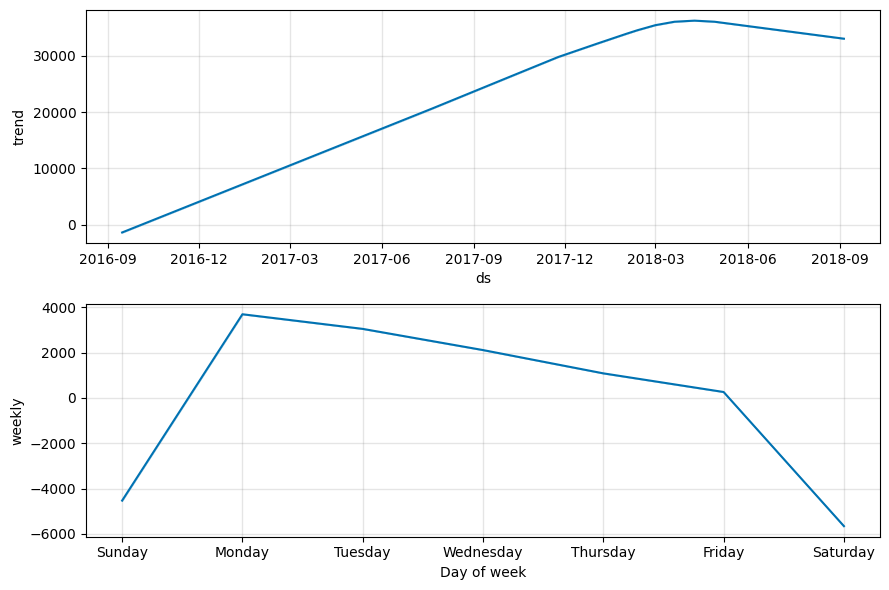

In [32]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail(7)
model.plot_components(forecast)

In [37]:
df['ds'] = pd.to_datetime(df['ds'])
last_date = df['ds'].max()
next_week_forecast = forecast[forecast['ds'] > last_date]
print(next_week_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
612 2018-08-30  34286.440728  22557.196061  47729.780124
613 2018-08-31  33440.700623  20557.678776  45869.939355
614 2018-09-01  27502.555568  15192.632793  40510.967707
615 2018-09-02  28604.800393  15983.288257  40730.432878
616 2018-09-03  36799.308325  23243.240838  49320.257958
617 2018-09-04  36130.688735  23761.366276  48916.786019
618 2018-09-05  35173.114760  23119.260512  46654.045157
